In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\prasa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

# IMPORTING THE CSV FILE 

In [5]:
dataset = pd.read_csv(r"C:\Users\prasa\Desktop\BakeryBasket.csv", encoding = "latin1")
dataset.head(16)

,Date,Time,Transaction,Item
0,30-10-2016,09:58:11,1,Bread
1,30-10-2016,10:05:34,2,Scandinavian
2,30-10-2016,10:05:34,2,Scandinavian
3,30-10-2016,10:07:57,3,Hot chocolate
4,30-10-2016,10:07:57,3,Jam
5,30-10-2016,10:07:57,3,Cookies
6,30-10-2016,10:08:41,4,Muffin
7,30-10-2016,10:13:03,5,Coffee
8,30-10-2016,10:13:03,5,Pastry
9,30-10-2016,10:13:03,5,Bread


# FINDING THE TOTAL NUMBER OF ENTRIES AND THE NUMBER OF VARIBLES

In [6]:
dataset.shape

(21293, 4)

# FINDING THE NULL VALUES

In [7]:
dataset.isnull().any()

Date           False
Time           False
Transaction    False
Item           False
dtype: bool

# VARIABLE DATATYPES

In [8]:
dataset.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [9]:
dataset['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

# TOTAL NUMBER OF SALES ON A PARTICULAR DATE

In [10]:
dataset['Date'].value_counts().iloc[:16]

04-02-2017    302
05-11-2016    283
04-03-2017    265
25-03-2017    254
28-01-2017    243
18-02-2017    240
12-11-2016    227
19-11-2016    216
11-03-2017    210
08-04-2017    209
21-01-2017    207
31-10-2016    205
06-11-2016    203
03-12-2016    200
07-01-2017    199
14-01-2017    195
Name: Date, dtype: int64

# VISUALIZING THE ABOVE RESULTS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

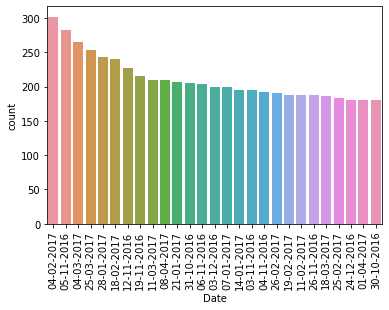

In [11]:
sns.countplot(x='Date', data=dataset, order=dataset['Date'].value_counts().iloc[:27].index)
plt.xticks(rotation=90)

# TOTAL NUMBER OF SALES ON A PARTICULAR TIME

In [12]:
dataset['Time'].value_counts()

12:07:39    16
10:45:21    13
14:38:01    13
10:55:19    13
15:09:18    12
            ..
11:42:42     1
13:07:35     1
15:59:29     1
09:35:04     1
21:43:15     1
Name: Time, Length: 8240, dtype: int64

# VISUALIZING THE ABOVE RESULTS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

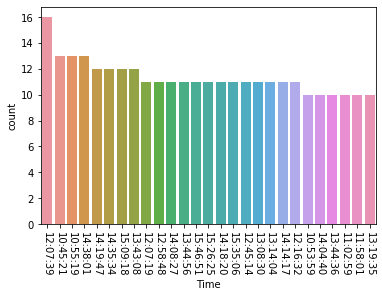

In [13]:
sns.countplot(x='Time', data=dataset, order=dataset['Time'].value_counts().iloc[:27].index)
plt.xticks(rotation=270)

# FINDING THE SALES COUNT

In [13]:
dataset['Item'].value_counts().iloc[:27]

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
NONE               786
Sandwich           771
Medialuna          616
Hot chocolate      590
Cookies            540
Brownie            379
Farm House         374
Muffin             370
Juice              369
Alfajores          369
Soup               342
Scone              327
Toast              318
Scandinavian       277
Truffles           193
Coke               185
Spanish Brunch     172
Fudge              159
Baguette           152
Jam                149
Tiffin             146
Mineral water      136
Name: Item, dtype: int64

# VISUALIZING THE ABOVE RESULTS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

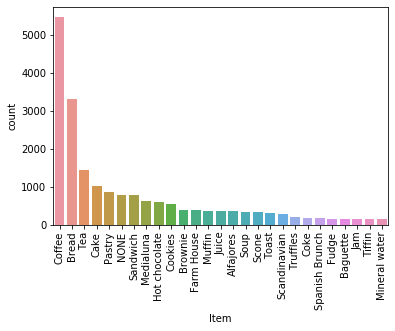

In [14]:
sns.countplot(x='Item', data=dataset, order=dataset['Item'].value_counts().iloc[:27].index)
plt.xticks(rotation=90)

# COMPARING THE SALES OF TWO ITEMS

maximum number of hot chocolate sold:14
maximum number of coff sold:72


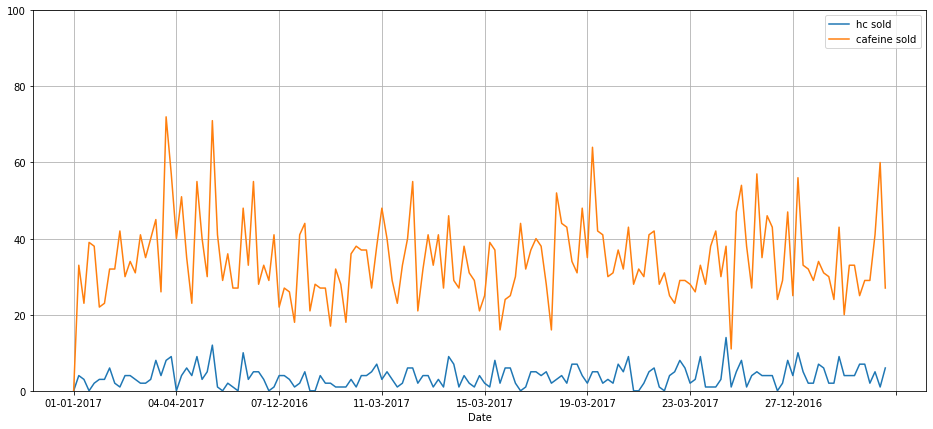

In [15]:
dt = dataset.groupby("Date")["Item"].apply(lambda x: x[x=="Hot chocolate"].count()).rename("hc sold").to_frame()
dt["cafeine sold"] = dataset.groupby("Date")["Item"].apply(lambda x: x[x=="Coffee"].count())
dt.plot(figsize=(16,7))
plt.ylim([0,100])
plt.grid(True)
plt.legend()
print("maximum number of hot chocolate sold:" +str(dt["hc sold"].max()))
print("maximum number of coff sold:" +str(dt["cafeine sold"].max()))



# FINDING THE ANNUAL SALES

[Text(0, 0, '1 / 2016'),
 Text(0, 0, '1 / 2017'),
 Text(0, 0, '2 / 2016'),
 Text(0, 0, '2 / 2017'),
 Text(0, 0, '3 / 2016'),
 Text(0, 0, '3 / 2017'),
 Text(0, 0, '4 / 2016'),
 Text(0, 0, '4 / 2017'),
 Text(0, 0, '5 / 2016'),
 Text(0, 0, '5 / 2017'),
 Text(0, 0, '6 / 2016'),
 Text(0, 0, '6 / 2017'),
 Text(0, 0, '7 / 2016'),
 Text(0, 0, '7 / 2017'),
 Text(0, 0, '8 / 2016'),
 Text(0, 0, '8 / 2017'),
 Text(0, 0, '9 / 2016'),
 Text(0, 0, '9 / 2017'),
 Text(0, 0, '10 / 2016'),
 Text(0, 0, '10 / 2017'),
 Text(0, 0, '11 / 2016'),
 Text(0, 0, '11 / 2017'),
 Text(0, 0, '12 / 2016'),
 Text(0, 0, '12 / 2017')]

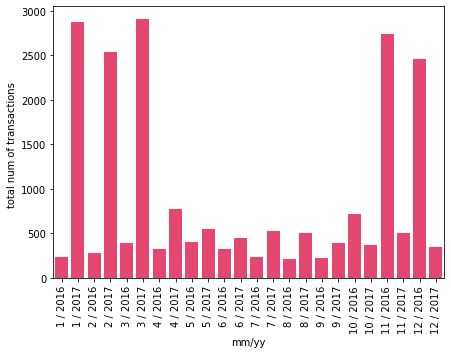

In [16]:
ym=dataset.copy()  
ym['Date']=pd.to_datetime(ym['Date'])
ym['Month'],ym['Year']=ym['Date'].dt.month,ym['Date'].dt.year
grp_ym=ym.groupby(['Month','Year'])['Transaction'].count().reset_index()
grp_ym['Interval'] = grp_ym.Month.astype(str).str.cat(grp_ym.Year.astype(str), sep=' / ')
fig,axis=plt.subplots(figsize=(7,5))
axis=sns.barplot(data=grp_ym,x='Interval',y='Transaction',color = ("#FE2E64"))
axis.set_xlabel('mm/yy')
axis.set_ylabel('total num of transactions ')
axis.set_xticklabels(grp_ym['Interval'], rotation=90)

# ANNUAL SALES OF SEVEN DAYS IN A WEEK

In [17]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset["daynumber"] = dataset["Date"].dt.weekday
dataset['daynumber'].value_counts()

5    3736
4    3381
6    3239
0    3126
1    2733
3    2670
2    2408
Name: daynumber, dtype: int64

# NUMBER OF PRODUCTS SOLD EVERY DAY

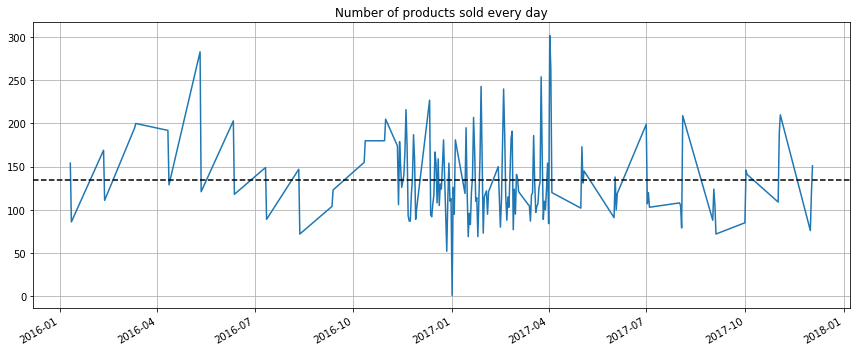

In [18]:
products_days =dataset["Date"].value_counts().sort_index().rename("Products sold")
mean = round(products_days.mean(),0)
maximum_day = products_days.index[products_days==products_days.max()][0]
ax = products_days.plot(figsize=(12,5), x_compat=True)
text1 = '$\mu=$' + str(mean)[:-2]
plt.grid(True)
plt.title("Number of products sold every day")
plt.axhline(mean, c="k", linestyle='--')
plt.tight_layout()

KeyError: ''

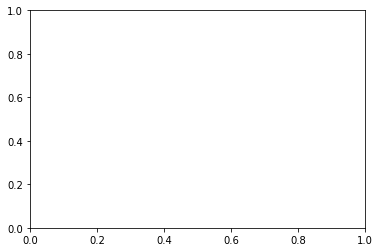

In [20]:
# items sold per weekday
fig, ax = plt.subplots()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
products_weekdays = dataset[""].value_counts().rename("Products sold").reindex(days)
products_weekdays.plot(kind='bar', figsize=(8,7), ax=ax, color=("#00b3b0"))
plt.xticks(rotation=0)
for i, v in enumerate(products_weekdays.values):
    ax.text(i, v+80, str(v), color="#000d1a", fontweight='bold', fontsize=14, ha='center')


# HOURLY ANALYSIS AND VISUALIZATIONS

In [22]:
amount=dataset.copy()
amount['time'] = amount.Date.astype(str).str.cat(amount.Time.astype(str), sep=' ')
amount['time']=pd.to_datetime(amount['time'])
amount['hour'] = amount['time'].dt.round('H').dt.hour
amount.drop(['Time','Date'],axis=1,inplace=True)

In [23]:
coffeehrs=amount[(amount['Item']== 'Coffee')]
coffeehrs=coffeehrs.groupby('hour')['Item'].count()
coffeehrs=coffeehrs.reset_index()
coffeehrs 

,hour,Item
0,7,1
1,8,81
2,9,414
3,10,682
4,11,944
5,12,831
6,13,651
7,14,630
8,15,571
9,16,453


Text(0, 0.5, 'number of times coffee has been sold')

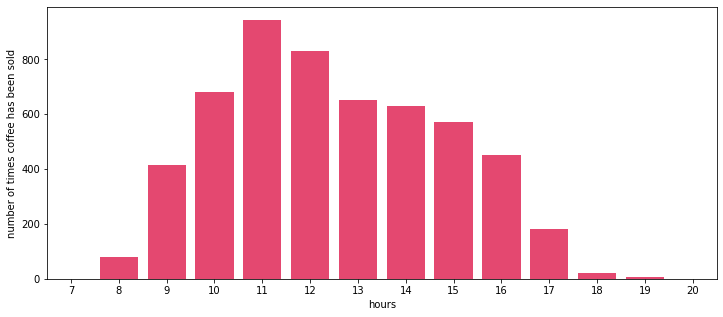

In [24]:
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(data=coffeehrs,x='hour',y='Item', color="#FE2E64")
ax.set_xlabel('hours')
ax.set_ylabel('number of times coffee has been sold')

Text(0, 0.5, 'number of times bread has been sold')

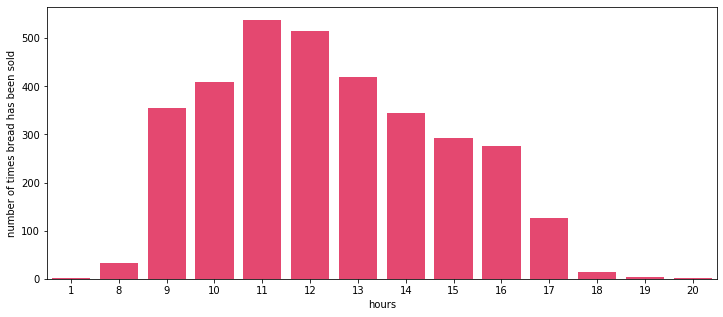

In [24]:
bdhrs=amount[amount['Item']=='Bread']
bdhrs=bdhrs.groupby('hour')['Item'].count()
bdhrs=bdhrs.reset_index()
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(data=bdhrs,x='hour',y='Item', color="#FE2E64")
ax.set_xlabel('hours')
ax.set_ylabel('number of times bread has been sold')

Text(0, 0.5, 'number of times sandwich has been sold')

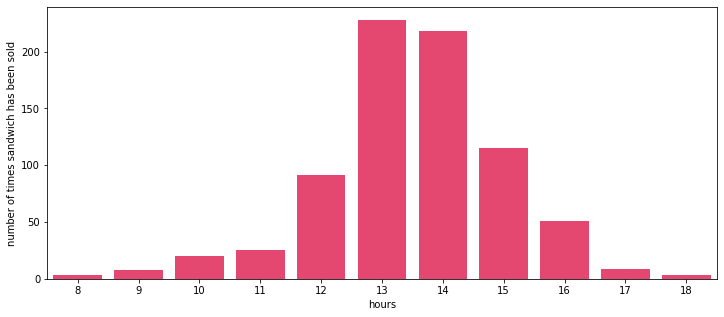

In [25]:
sdmhrs=amount.loc[(amount['Item']=='Sandwich')]
sdmhrs=sdmhrs.groupby('hour')['Item'].count()
sdmhrs=sdmhrs.reset_index()
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(data=sdmhrs,x='hour',y='Item', color="#FE2E64")
ax.set_xlabel('hours')
ax.set_ylabel('number of times sandwich has been sold')

Text(0, 0.5, 'number of times cake has been sold')

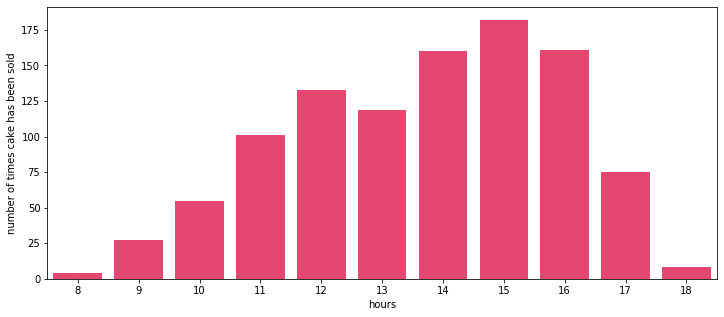

In [26]:
ckhrs=amount.loc[(amount['Item']=='Cake')]
ckhrs=ckhrs.groupby('hour')['Item'].count()
ckhrs=ckhrs.reset_index()
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(data=ckhrs,x='hour',y='Item', color="#FE2E64")
ax.set_xlabel('hours')
ax.set_ylabel('number of times cake has been sold')

Text(0, 0.5, 'number of times tea has been sold')

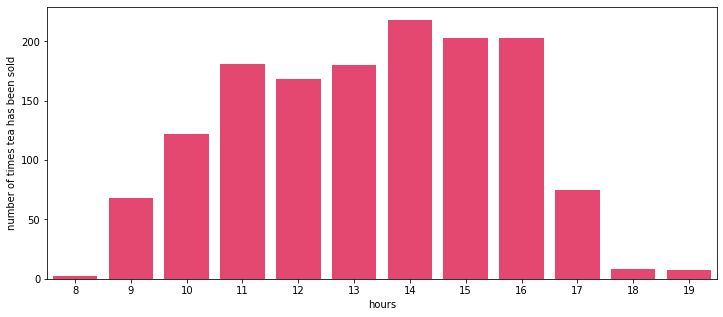

In [29]:

thrs=amount.loc[(amount['Item']=='Tea')]
thrs=thrs.groupby('hour')['Item'].count()
thrs=thrs.reset_index()

fig,ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(data=thrs,x='hour',y='Item', color="#FE2E64")
ax.set_xlabel('hours')
ax.set_ylabel('number of times tea has been sold')

Text(0, 0.5, 'number of times cookies has been sold')

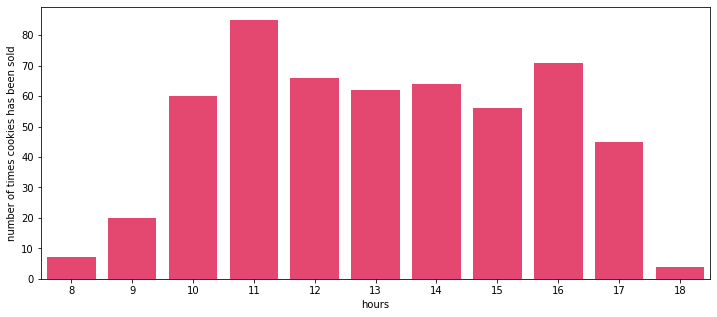

In [27]:
hcchrs=amount.loc[(amount['Item']=='Cookies')]
hcchrs=hcchrs.groupby('hour')['Item'].count()
hcchrs=hcchrs.reset_index()
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(data=hcchrs,x='hour',y='Item', color="#FE2E64")
ax.set_xlabel('hours')
ax.set_ylabel('number of times cookies has been sold')

Text(0, 0.5, 'number of times soup has been sold')

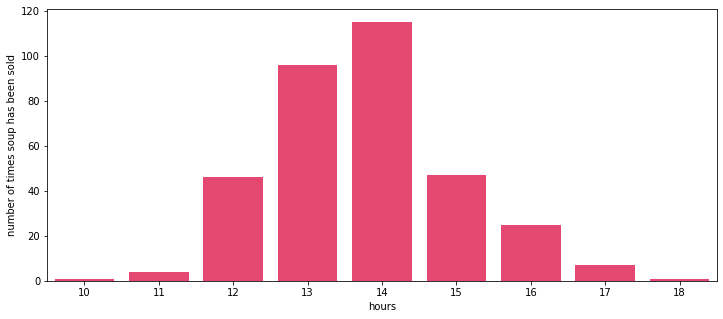

In [26]:
brmhrs=amount.loc[(amount['Item']=='Soup')]
brmhrs=brmhrs.groupby('hour')['Item'].count()
brmhrs=brmhrs.reset_index()
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.barplot(data=brmhrs,x='hour',y='Item', color="#FE2E64")
ax.set_xlabel('hours')
ax.set_ylabel('number of times soup has been sold')

In [28]:
df = dataset.groupby(['Transaction','Item']).size().reset_index(name='count')
dataset0 = (df.groupby(['Transaction', 'Item'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
dataset_bake = dataset0.applymap(encode_units)

In [29]:
dataset_bake.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# CORRELATION ANALYSIS

In [30]:
dataset_bake.corr() 

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Item,,,,,,,,,,,,,,,,,,,,,
Adjustment,1.000000,-0.000690,-0.001982,-0.000278,-0.000648,-0.000105,-0.001304,-0.000729,-0.000235,-0.000257,...,-0.000105,-0.000802,-0.001278,-0.001903,-0.001469,-0.000481,-0.000379,-0.000420,-0.000759,-0.000278
Afternoon with the baker,-0.000690,1.000000,-0.013027,0.113756,-0.004259,-0.000690,-0.008570,-0.004790,-0.001542,-0.001690,...,-0.000690,0.014863,-0.008397,-0.012507,0.001491,-0.003163,-0.002488,-0.002761,-0.004986,-0.001825
Alfajores,-0.001982,-0.013027,1.000000,-0.005246,0.014537,-0.001982,-0.002183,0.002126,-0.004433,-0.004857,...,-0.001982,-0.007908,0.012506,-0.020289,0.016296,-0.009093,-0.007151,-0.007935,0.000941,0.015518
Argentina Night,-0.000278,0.113756,-0.005246,1.000000,-0.001715,-0.000278,-0.003451,-0.001929,-0.000621,-0.000680,...,-0.000278,-0.002121,-0.003381,-0.005037,-0.003887,-0.001274,-0.001002,0.093494,-0.002008,-0.000735
Art Tray,-0.000648,-0.004259,0.014537,-0.001715,1.000000,0.161906,0.005236,0.019019,0.071262,-0.001588,...,-0.000648,0.016458,-0.007891,0.006788,0.014630,-0.002973,-0.002338,-0.002594,-0.004686,-0.001715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tshirt,-0.000481,-0.003163,-0.009093,-0.001274,-0.002973,-0.000481,-0.005982,-0.003343,-0.001077,-0.001179,...,-0.000481,-0.003677,-0.005861,-0.008730,0.009189,1.000000,0.119525,-0.001927,-0.003480,-0.001274
Valentine's card,-0.000379,-0.002488,-0.007151,-0.001002,-0.002338,-0.000379,-0.004705,-0.002629,-0.000847,-0.000928,...,-0.000379,-0.002892,-0.004610,-0.006866,-0.005299,0.119525,1.000000,-0.001515,-0.002737,-0.001002
Vegan Feast,-0.000420,-0.002761,-0.007935,0.093494,-0.002594,-0.000420,-0.005220,-0.002917,-0.000939,-0.001029,...,-0.000420,-0.003209,-0.005115,-0.007618,-0.005880,-0.001927,-0.001515,1.000000,-0.003037,-0.001112


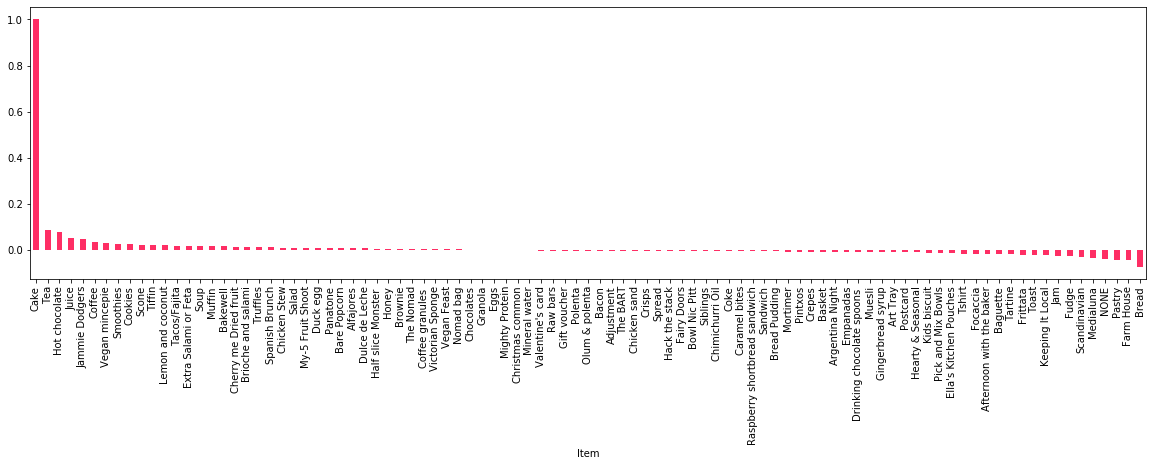

In [31]:
dataset_bake.corr()['Cake'].sort_values(ascending = False).plot(kind='bar', figsize=(20,5), color=("#FE2E64"))

In [32]:
dataset_bake.corr()['Cake'].sort_values(ascending = False)

Item
Cake              1.000000
Tea               0.084853
Hot chocolate     0.075422
Juice             0.052768
Jammie Dodgers    0.048844
                    ...   
Medialuna        -0.036413
NONE             -0.037935
Pastry           -0.043248
Farm House       -0.043277
Bread            -0.072491
Name: Cake, Length: 95, dtype: float64

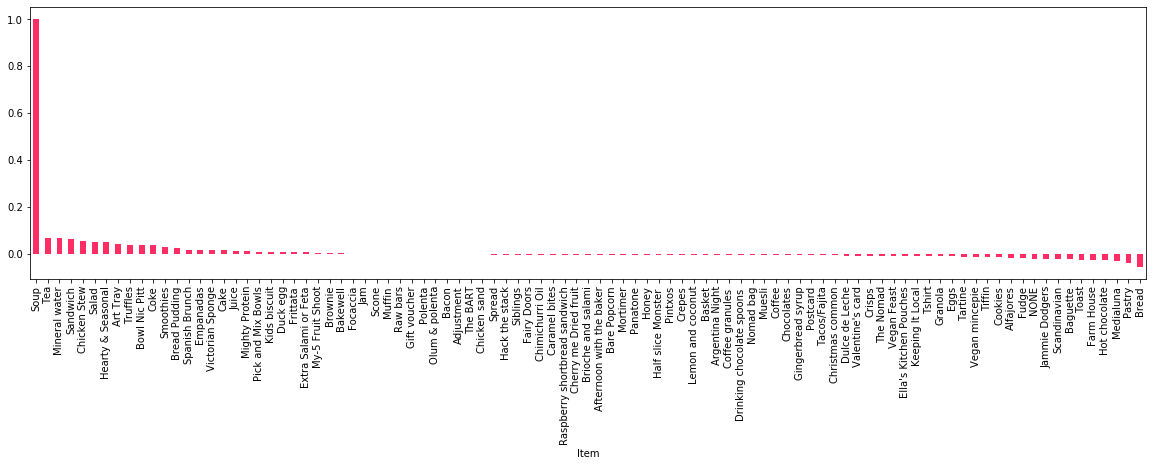

In [33]:
dataset_bake.corr()['Soup'].sort_values(ascending = False).plot(kind='bar', figsize=(20,5), color=("#FE2E64"))

In [35]:
dataset_bake.corr()['Soup'].sort_values(ascending = False)

Item
Soup             1.000000
Tea              0.065932
Mineral water    0.065783
Sandwich         0.064457
Chicken Stew     0.055202
                   ...   
Farm House      -0.025935
Hot chocolate   -0.026890
Medialuna       -0.031288
Pastry          -0.038967
Bread           -0.054147
Name: Soup, Length: 95, dtype: float64

# APRIORI ALGORITHM / COMBINATION ANALYSIS

In [36]:
itm = apriori(dataset_bake, min_support=0.01, use_colnames=True)
rle = association_rules(itm, metric="lift")
rle.sort_values('support', ascending = False, inplace = True)
print(rle.shape)
rle.head(5)

(54, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
16,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
35,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
34,(Coffee),(Pastry),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402
33,(Coffee),(NONE),0.475081,0.079005,0.042073,0.088560,1.120938,0.004539,1.010483


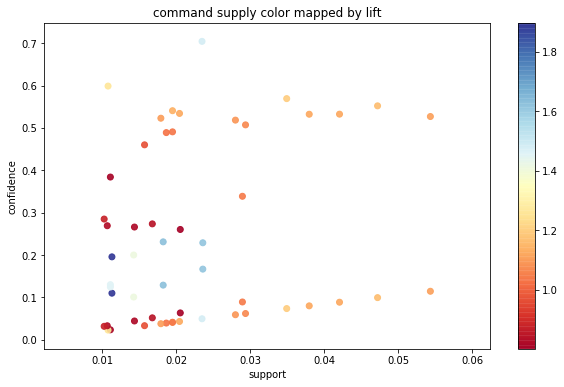

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(rle['support'], rle['confidence'], c=rle['lift'], alpha=0.9, cmap='RdYlBu');
plt.title('command supply color mapped by lift');
plt.xlabel('support')
plt.ylabel('confidence')
plt.colorbar();

In [76]:
itm = apriori(dataset_bake, min_support=0.01, use_colnames=True)
rle2 = association_rules(itm, metric="lift",  min_threshold=1.2)
rle2.sort_values('confidence', ascending = False, inplace = True)
print(rle2.shape)
rle2

(14, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
4,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
8,(NONE),(Tea),0.079005,0.141643,0.018256,0.231076,1.631394,0.007066,1.116309
3,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146
10,(Sandwich),(Tea),0.071346,0.141643,0.014269,0.200000,1.412000,0.004164,1.072946
0,(Hot chocolate),(Cake),0.057916,0.103137,0.011331,0.195652,1.897010,0.005358,1.115019
2,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235
13,(Pastry),"(Bread, Coffee)",0.085510,0.089393,0.011122,0.130061,1.454947,0.003478,1.046749
9,(Tea),(NONE),0.141643,0.079005,0.018256,0.128889,1.631394,0.007066,1.057264
12,"(Bread, Coffee)",(Pastry),0.089393,0.085510,0.011122,0.124413,1.454947,0.003478,1.044430


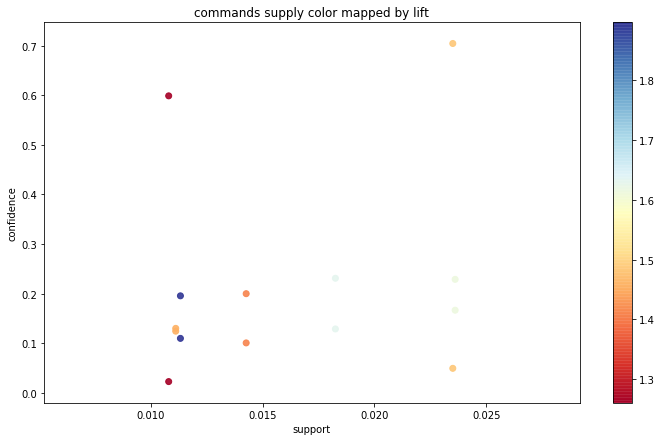

In [77]:
plt.figure(figsize=(12, 7))
plt.scatter(rle2['support'], rle2['confidence'], c=rle2['lift'], alpha=0.9, cmap='RdYlBu');
plt.title('commands supply color mapped by lift');
plt.xlabel('support')
plt.ylabel('confidence')
plt.colorbar();

In [38]:
rle["antecedent_len"] = rle["antecedents"].apply(lambda x: len(x))
print(rle.shape)
rle.head(10)

(54, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
17,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717,1
16,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,1
35,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079,1
34,(Coffee),(Pastry),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402,1
33,(Coffee),(NONE),0.475081,0.079005,0.042073,0.088560,1.120938,0.004539,1.010483,1
32,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908,1
37,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468,1
36,(Coffee),(Sandwich),0.475081,0.071346,0.037981,0.079947,1.120551,0.004086,1.009348,1
28,(Coffee),(Medialuna),0.475081,0.061379,0.034939,0.073542,1.198175,0.005779,1.013129,1
29,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,1


In [39]:
rle[rle['antecedent_len'] >= 2 ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
51,"(Bread, Pastry)",(Coffee),0.028958,0.475081,0.011122,0.384058,0.808405,-0.002636,0.852221,2
50,"(Coffee, Bread)",(Pastry),0.089393,0.085510,0.011122,0.124413,1.454947,0.003478,1.044430,2


In [40]:
rle[(rle['antecedent_len'] >= 2) &
      (rle['confidence'] >= 0.1)& 
      (rle['lift'] >= 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
50,"(Coffee, Bread)",(Pastry),0.089393,0.08551,0.011122,0.124413,1.454947,0.003478,1.04443,2
